In [1]:
from sklearn.base import BaseEstimator, ClassifierMixin

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [3]:
class XOR(BaseEstimator, ClassifierMixin):
    def __init__(self):
        
        #self.w1 = np.random.rand(2,3)
        #self.w2 = np.random.rand(1,3)

        self.w1 = np.array([[2.5372, -6.2275, -6.2294],[7.4763, -5.0204, -5.0207]])
        self.w2 = np.array([[-4.5360, -10.4272, 9.8329]])

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-1 * x))
        
    def fit(self, X, y=None):
        
        self.forward_fase(X, y)

        return self

    def forward_fase(self, X, y=None):

        X = np.array(X)

        bias = np.ones((X.shape[0], 1))
        a1 = np.hstack((bias, X))
        
        z2 = a1.dot(self.w1.T)
        x2 = self.sigmoid(z2)
        a2 = np.hstack((bias, x2))

        z3 = a2.dot(self.w2.T)
        return self.sigmoid(z3)

    def predict(self, X):
        y = self.forward_fase(X)
        return (y > 0.5).astype(int)

In [4]:
data = np.array([
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
])

X_train = data[:, 0:2]
y_train = data[:, 2]

xor = XOR().fit(X_train, y_train)

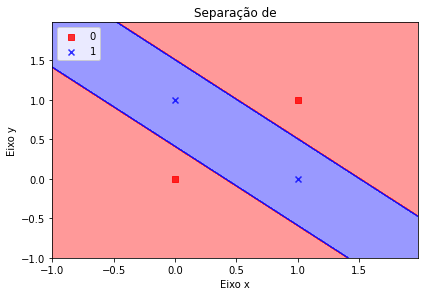

In [5]:
plot_decision_regions(data[:, :2], data[:,-1], xor)
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('Separação de')
plt.show()